In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
mpl.rcParams['figure.figsize']=(12,10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
path_train = r"C:\Users\84280\Desktop\lianxi\UFJ\train.csv"
path_test=r"C:\Users\84280\Desktop\lianxi\UFJ\test.csv"

In [4]:
file=keras.utils
raw_df=pd.read_csv(path_train)
raw_test=pd.read_csv(path_test)

In [5]:
raw_df.head(5),raw_test.head(5)

(   Unnamed: 0             purpose  int.rate  installment  annual.inc    dti  \
 0           0                 NaN    0.1691       652.10    29579.74  10.66   
 1           1      major_purchase    0.1354       191.27    52808.95  13.06   
 2           2         credit_card    0.0758       377.00   168689.22  11.98   
 3           3  debt_consolidation    0.1774       359.33    71325.19  20.55   
 4           4         credit_card    0.1430       875.45   130773.88  17.61   
 
    fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
 0   730               3333     4955.0        39.6               4   
 1   707               6063    12335.0        37.8               2   
 2   736               2681     1505.0         5.0               1   
 3   702               3972    39536.0        94.1               1   
 4   688               5555    17295.0        56.4               0   
 
    delinq.2yrs  pub.rec  not.fully.paid  
 0            2        0               1  
 1        

In [6]:
df=pd.concat([raw_df,raw_test],ignore_index=False)
df.reset_index(inplace=True)
df.drop(columns=["index","Unnamed: 0"])

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,NaN,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1.0
1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0.0
2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0.0
3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0.0
4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,home_improvement,0.1592,912.78,204278.05,12.73,761,7554,5823.0,30.9,8,0,0,NaN
81567,all_other,0.1039,105.07,26707.34,19.99,734,10250,14821.0,51.9,2,0,0,NaN
81568,debt_consolidation,0.1170,680.57,86555.61,16.55,741,4515,15540.0,46.6,0,0,0,NaN
81569,debt_consolidation,0.1286,368.30,73806.47,15.91,681,2315,38974.0,77.0,0,1,0,NaN


In [7]:
len_train=raw_df.shape[0]
len_test=raw_test.shape[0]
print(raw_df.shape,raw_test.shape,df.shape)

(40785, 14) (40786, 13) (81571, 15)


In [8]:
df_1=df.copy()

In [9]:
def check_df(df):
    print("-------------------------columns----------------------------")
    print(df.columns)
    print("-------------------------index-------------------------------")
    print(df.index)
    print("-------------------------dtypes------------------------------")
    print(df.dtypes)
    print("-------------------------nan any----------------------------")
    print(df.isnull().values.any())
    print("-------------------------balance----------------------------")
    to=df[df.columns[-1]].count()
    x=df[df.columns[-1]][df[df.columns[-1]]==1].count()
    print('examples:\n total:{}\n positive:{}({:.2f}% of total)\n'.format(to,x,100*x/to))
    print('-------------------------Na sum ratioa----------------------')
    print(pd.DataFrame({"sum":df.isnull().sum(),"ratio":df.isnull().sum()/df.shape[0]}))
    print('-------------------------quantiles-----------------------')
    print(df.describe().T)






In [10]:
check_df(df)

-------------------------columns----------------------------
Index(['index', 'Unnamed: 0', 'purpose', 'int.rate', 'installment',
       'annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')
-------------------------index-------------------------------
RangeIndex(start=0, stop=81571, step=1)
-------------------------dtypes------------------------------
index                  int64
Unnamed: 0             int64
purpose               object
int.rate             float64
installment          float64
annual.inc           float64
dti                  float64
fico                   int64
days.with.cr.line      int64
revol.bal            float64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid       float64
dtype: object
-------------------------nan any----------------------------
True
---------

              purpose  count
0  debt_consolidation  15415
1         credit_card  13549
2           all_other  12242
3      small_business  10555
4    home_improvement  10450
5         educational   9196
6      major_purchase   8887


C:\Users\84280\AppData\Local\Temp\ipykernel_11588\1218984130.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels,y=values,palette=colors[:len(purpose_counts)],ax=ax[0],edgecolor='black')
C:\Users\84280\AppData\Local\Temp\ipykernel_11588\1218984130.py:16: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=labels,y=values,palette=colors[:len(purpose_counts)],ax=ax[0],edgecolor='black')


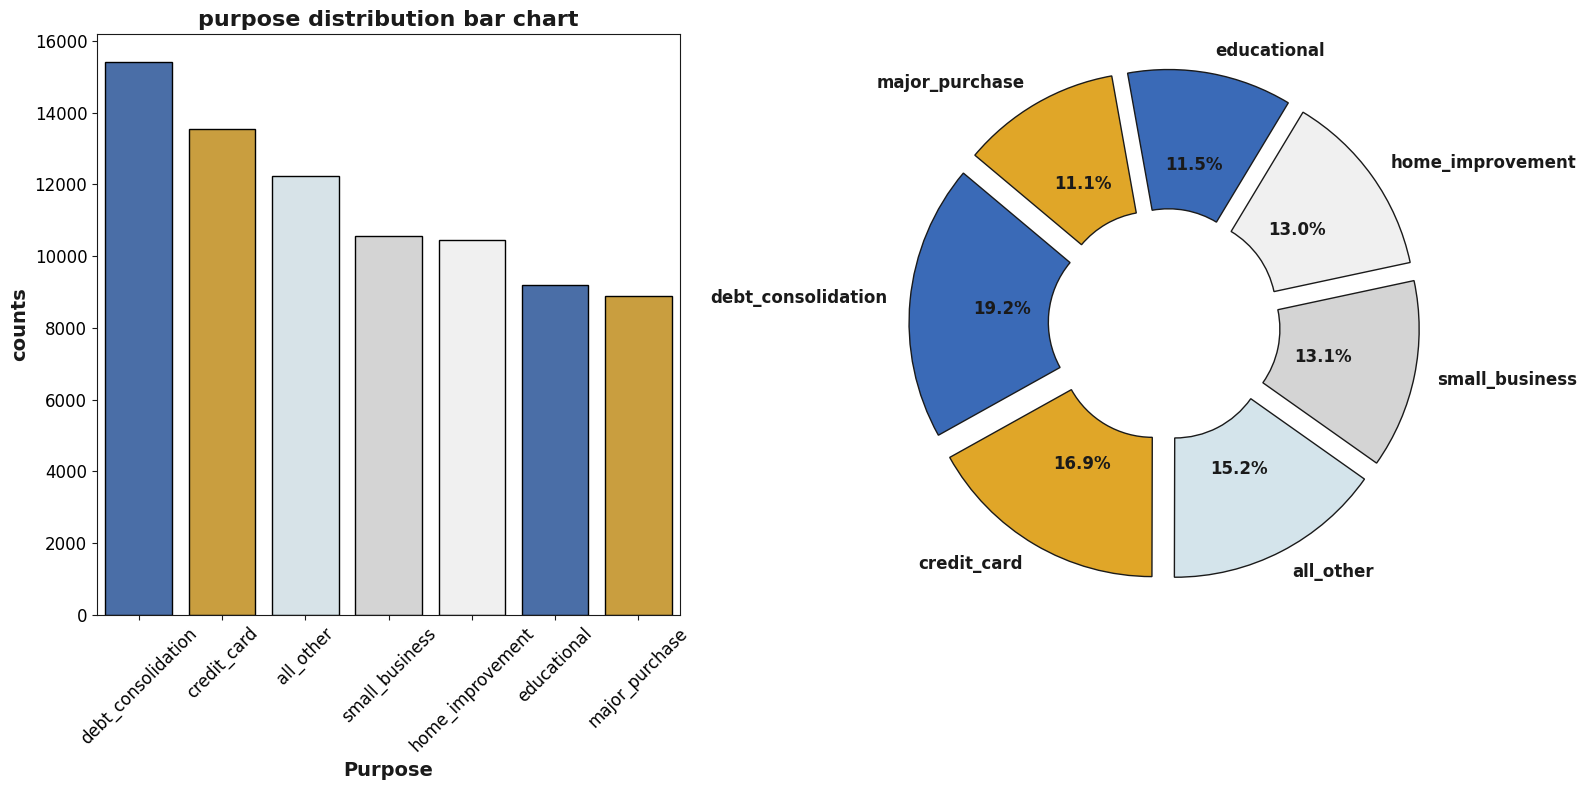

In [11]:
purpose_counts=df_1["purpose"].value_counts()

purpose_counts_df=pd.DataFrame({'purpose':purpose_counts.index,'count':purpose_counts.values})

print(purpose_counts_df)

colors = ['#3A6AB7', '#E0A628', '#D4E4EB', '#D4D4D4', '#F0F0F0']
cl='#1A1A1A'
ft='bold'

labels=purpose_counts.index
values=purpose_counts.values

fig,ax= plt.subplots(1,2,figsize=(16,8))

sns.barplot(x=labels,y=values,palette=colors[:len(purpose_counts)],ax=ax[0],edgecolor='black')
ax[0].set_xlabel('Purpose',fontsize=14,fontweight=ft,color=cl)
ax[0].set_ylabel('counts',fontsize=14,fontweight=ft,color=cl)
ax[0].set_title('purpose distribution bar chart',fontsize=16,fontweight='bold',color=cl)
ax[0].tick_params(axis='x',labelsize=12,color=cl,rotation=45)
ax[0].tick_params(axis='y',labelsize=12,color=cl)
for spine in ax[0].spines.values():
    spine.set_edgecolor(cl)

ax[1].pie(purpose_counts,labels=labels, autopct='%1.1f%%',startangle=140,colors=colors[:len(purpose_counts)],explode=(0.1,)*len(purpose_counts),textprops={'fontsize':12,'color':cl,'weight':ft},wedgeprops=dict(width=0.6,edgecolor=cl))
plt.tight_layout()

plt.show()


In [12]:
df_1

,index,Unnamed: 0,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,0,NaN,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1.0
1,1,1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0.0
2,2,2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0.0
3,3,3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0.0
4,4,4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,40781,81566,home_improvement,0.1592,912.78,204278.05,12.73,761,7554,5823.0,30.9,8,0,0,NaN
81567,40782,81567,all_other,0.1039,105.07,26707.34,19.99,734,10250,14821.0,51.9,2,0,0,NaN
81568,40783,81568,debt_consolidation,0.1170,680.57,86555.61,16.55,741,4515,15540.0,46.6,0,0,0,NaN
81569,40784,81569,debt_consolidation,0.1286,368.30,73806.47,15.91,681,2315,38974.0,77.0,0,1,0,NaN


In [13]:
df_1.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [14]:
df_1.isnull().sum()

purpose               1277
int.rate                 0
installment             10
annual.inc               0
dti                      0
fico                     0
days.with.cr.line        0
revol.bal                7
revol.util              29
inq.last.6mths           0
delinq.2yrs              0
pub.rec                  0
not.fully.paid       40786
dtype: int64

In [15]:
df_1['installment'].fillna(df_1['installment'].median(),inplace=True)

C:\Users\84280\AppData\Local\Temp\ipykernel_11588\883683251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['installment'].fillna(df_1['installment'].median(),inplace=True)


In [16]:
df_1['revol.bal'].fillna(df_1['revol.bal'].median(),inplace=True)
df_1['revol.util'].fillna(df_1['revol.util'].median(),inplace=True)

C:\Users\84280\AppData\Local\Temp\ipykernel_11588\3337169155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['revol.bal'].fillna(df_1['revol.bal'].median(),inplace=True)
C:\Users\84280\AppData\Local\Temp\ipykernel_11588\3337169155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [17]:
df_1.isnull().sum()

purpose               1277
int.rate                 0
installment              0
annual.inc               0
dti                      0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
inq.last.6mths           0
delinq.2yrs              0
pub.rec                  0
not.fully.paid       40786
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
df_copy=df_1.copy()

In [20]:
purpose_train=df_copy.drop(['not.fully.paid'],axis=1)
purpose_train['purpose']=purpose_train['purpose'].fillna('missing')
le_y=LabelEncoder()
scl=MinMaxScaler()
purpose_train['purpose']=le_y.fit_transform(purpose_train['purpose'])
y_purpose=purpose_train['purpose']
feature=scl.fit_transform(purpose_train.drop(['purpose'],axis=1))
feature=pd.DataFrame(feature,columns=purpose_train.drop(['purpose'],axis=1).columns)
X_train,X_test,y_train,y_test=train_test_split(feature,y_purpose,test_size=0.3,random_state=42)

In [21]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint,uniform

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

ensemble_model=VotingClassifier(estimators=[
    ('rf',rf),
    ('gb',gb),
    ('knn',knn)
],voting='soft')

param_distribution= {
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': [None, 10, 20, 30],
    'gb__n_estimators': randint(50, 300),
    'gb__learning_rate': uniform(0.01, 0.19),
    'knn__n_neighbors': randint(3, 15)
}

grid_search = RandomizedSearchCV(
    estimator=ensemble_model,
    param_distributions=param_distribution,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1,
    n_iter=50,
    random_state=42
)

nan_indices=df_1.index[df_1['purpose'].isna()].tolist()


In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [25]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred=knn.predict(X_test)
knn_accuracy=accuracy_score(y_test,y_pred)

In [29]:
print(knn_accuracy)

0.23426773455377575


In [25]:
grid_search.fit(X_train,y_train)
y_pred=ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\84280\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
92 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\84280\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\84280\myenv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\84280\myenv\lib\site-packages\sklearn\utils\validation.py", line 66, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\84280\myenv\lib\site-packages\sklear

NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [23]:
### using machine learning model to predict the purpose's nan value is not that good, delete the nan value in training set and fit the nan value with mode


In [26]:
df_train=df_1[0:len_train].dropna(subset=['purpose']).reset_index(drop=True)

In [27]:
df_train.isnull().sum()

purpose              0
int.rate             0
installment          0
annual.inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [28]:
df_test=df_1[len_train:]

In [29]:
df_test['purpose']=df_test['purpose'].fillna(df_test['purpose'].mode().iloc[0])

C:\Users\84280\AppData\Local\Temp\ipykernel_11588\1607130110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['purpose']=df_test['purpose'].fillna(df_test['purpose'].mode().iloc[0])


In [30]:
df_test.isnull().sum()

purpose                  0
int.rate                 0
installment              0
annual.inc               0
dti                      0
fico                     0
days.with.cr.line        0
revol.bal                0
revol.util               0
inq.last.6mths           0
delinq.2yrs              0
pub.rec                  0
not.fully.paid       40786
dtype: int64

In [31]:
## delete the extrem value in /annual.inc/  dti/  revol.bal/ revol.util
columns_to_winsorize=['annual.inc','dti','revol.bal','revol.util']
def winsorize_column(data,column,lower_percentile=0.01,upper_percentile=0.99):
    lower_bound=data[column].quantile(lower_percentile)
    upper_bound=data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_bound,upper=upper_bound)
    return data
for i in columns_to_winsorize:
    winsorize_column(df_train,i)

In [32]:
len_train=len(df_train)
len_test=len(df_test)
df_2=pd.concat([df_train,df_test],ignore_index=False)
df_2

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0.0
1,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0.0
2,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0.0
3,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0.0
4,credit_card,0.1173,291.49,56004.28,2.58,701,3858,3076.0,36.1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,home_improvement,0.1592,912.78,204278.05,12.73,761,7554,5823.0,30.9,8,0,0,NaN
81567,all_other,0.1039,105.07,26707.34,19.99,734,10250,14821.0,51.9,2,0,0,NaN
81568,debt_consolidation,0.1170,680.57,86555.61,16.55,741,4515,15540.0,46.6,0,0,0,NaN
81569,debt_consolidation,0.1286,368.30,73806.47,15.91,681,2315,38974.0,77.0,0,1,0,NaN


In [33]:
print(len_train,len_test,len_train+len_test)

40012 40786 80798


In [34]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
int.rate,80798.0,0.125428,0.030527,0.0608,0.1053,0.1251,0.1451,0.90
installment,80798.0,301.321379,208.020324,15.6800,156.5200,240.7900,390.0600,939.38
annual.inc,80798.0,69542.029979,54401.435906,2128.3400,38611.3075,58340.5150,83962.8475,2000790.19
dti,80798.0,12.537138,6.821234,0.0900,6.7000,12.7500,17.9400,29.95
fico,80798.0,709.311208,39.318464,615.0000,679.0000,703.0000,737.0000,826.00
days.with.cr.line,80798.0,4712.143085,2555.010635,179.0000,2948.0000,4279.0000,5865.0000,17416.00
revol.bal,80798.0,15109.307922,20834.827362,1.0000,3398.0000,8344.0000,18871.7500,296156.00
revol.util,80798.0,46.281543,28.266202,0.1000,22.8000,44.6000,69.0000,109.60
inq.last.6mths,80798.0,1.535446,2.070959,0.0000,0.0000,1.0000,2.0000,14.00
delinq.2yrs,80798.0,0.180178,0.513141,0.0000,0.0000,0.0000,0.0000,3.00


In [35]:
df_2['annual.inc']=np.log(df_2['annual.inc'])
df_2['days.with.cr.line']=np.log(df_2['days.with.cr.line'])


In [36]:
df_2['revol.bal']=np.log(df_2['revol.bal'])

In [37]:
df_2['installment']=np.log(df_2['installment'])

In [38]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
int.rate,80798.0,0.125428,0.030527,0.060800,0.105300,0.125100,0.145100,0.900000
installment,80798.0,5.458869,0.748664,2.752386,5.053184,5.483925,5.966301,6.845220
annual.inc,80798.0,10.951989,0.623156,7.663098,10.561300,10.974052,11.338130,14.509053
dti,80798.0,12.537138,6.821234,0.090000,6.700000,12.750000,17.940000,29.950000
fico,80798.0,709.311208,39.318464,615.000000,679.000000,703.000000,737.000000,826.000000
days.with.cr.line,80798.0,8.305233,0.585189,5.187386,7.988882,8.361475,8.676758,9.765145
revol.bal,80798.0,8.938061,1.260574,0.000000,8.130942,9.029298,9.845421,12.598642
revol.util,80798.0,46.281543,28.266202,0.100000,22.800000,44.600000,69.000000,109.600000
inq.last.6mths,80798.0,1.535446,2.070959,0.000000,0.000000,1.000000,2.000000,14.000000
delinq.2yrs,80798.0,0.180178,0.513141,0.000000,0.000000,0.000000,0.000000,3.000000


In [39]:
continues_columns=[]
discrete_columns=[]
for i in df_2.columns:
    if i=='not.fully.paid':
        break
    if len(df_2[i].unique())>20:
        continues_columns.append(i)
    else:
        discrete_columns.append(i)
        
        

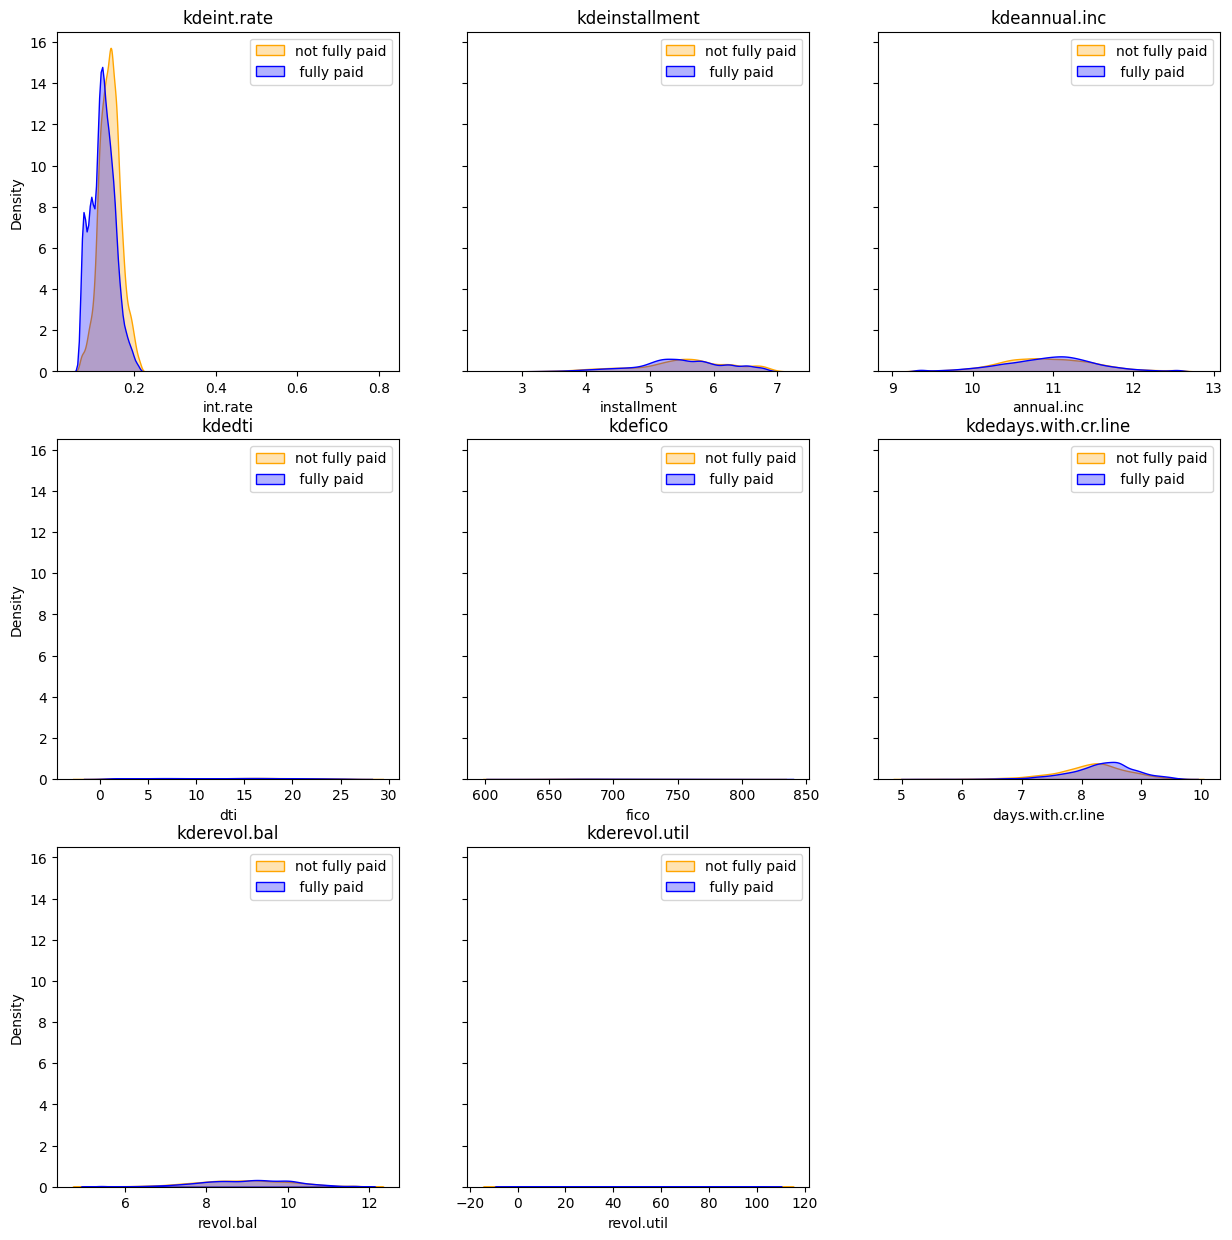

In [40]:
num_features=len(continues_columns)
rows=(num_features+2)//3
cols=min(num_features,3)

fig,axes=plt.subplots(rows,cols,figsize=(5*cols,5*rows),sharey=True)

axes=axes.flatten() if num_features>1 else [axes]

for i,feature in enumerate(continues_columns):
    sns.kdeplot(data=df_2[df_2['not.fully.paid']==1][feature],label='not fully paid',color='orange',fill=True,alpha=0.3,ax=axes[i])

    sns.kdeplot(data=df_2[df_2['not.fully.paid']==0][feature],label=' fully paid',color='blue',fill=True,alpha=0.3,ax=axes[i])
    axes[i].set_title(f'kde{feature}')
    axes[i].legend()
    
for j in range(num_features,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout
plt.show()
    
    

In [41]:
from scipy.stats import ks_2samp
continues_features=[]
for i in continues_columns:
    feature_values_fully_paid = df_2[df_2['not.fully.paid'] == 0][i]
    feature_values_not_fully_paid = df_2[df_2['not.fully.paid'] == 1][i]
    stat, p_value = ks_2samp(feature_values_fully_paid, feature_values_not_fully_paid)
    print(f"KS Statistic: {stat}, p-value: {p_value},feature:{i}")


KS Statistic: 0.26295413956057495, p-value: 3.24336323e-315,feature:int.rate
KS Statistic: 0.06892976706485254, p-value: 9.390405330659451e-22,feature:installment
KS Statistic: 0.0580925421972866, p-value: 1.4256786269862583e-15,feature:annual.inc
KS Statistic: 0.05141936381669687, p-value: 2.7182576199636e-12,feature:dti
KS Statistic: 0.2632234693303395, p-value: 7.167103e-316,feature:fico
KS Statistic: 0.15229962548544052, p-value: 6.3118951821995215e-105,feature:days.with.cr.line
KS Statistic: 0.05049439700130587, p-value: 7.200487444022366e-12,feature:revol.bal
KS Statistic: 0.05478342525400215, p-value: 6.772109015666523e-14,feature:revol.util


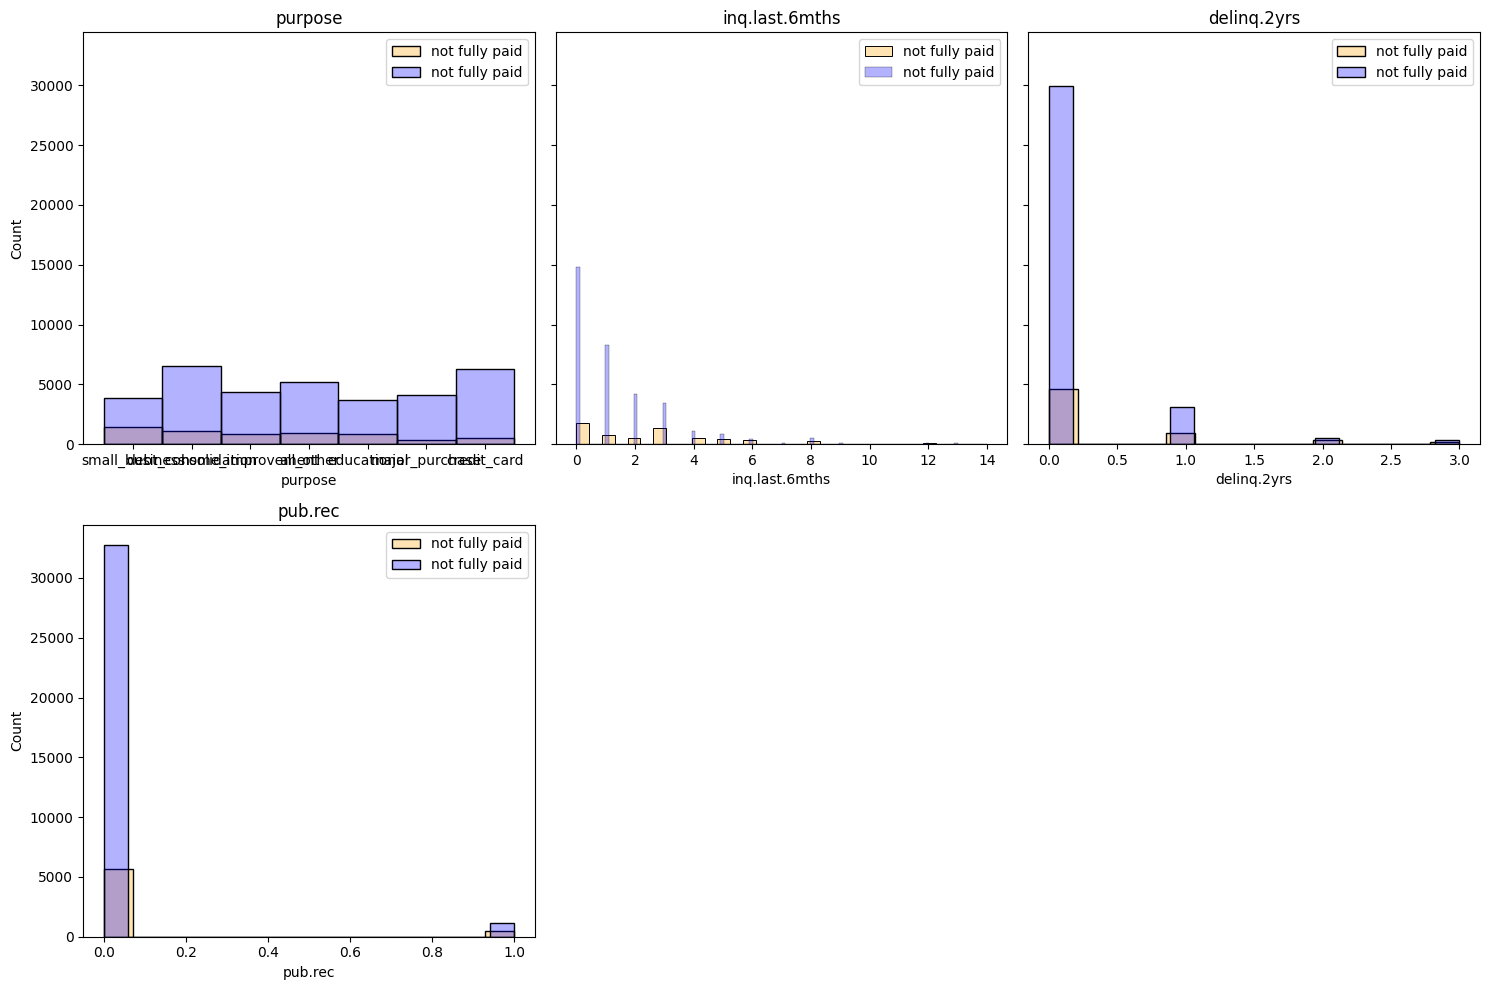

In [42]:
num_features=len(discrete_columns)
rows=(num_features+2)//3
cols=min(num_features,3)

fig,axes=plt.subplots(rows,cols,figsize=(5*cols,5*rows),sharey=True)

axes=axes.flatten() if num_features>1 else [axes]

for i, feature in enumerate(discrete_columns):
    sns.histplot(data=df_2[df_2['not.fully.paid']==1][feature],label='not fully paid',color='orange',fill=True,alpha=0.3,ax=axes[i])
    sns.histplot(data=df_2[df_2['not.fully.paid']==0][feature],label='not fully paid',color='blue',fill=True,alpha=0.3,ax=axes[i])
    
    axes[i].set_title(f'{feature}')
    axes[i].legend()

for j in range(num_features,len(axes)):
    fig.delaxes(axes[j])
    

plt.tight_layout()
plt.show()


In [43]:
neg,pos=np.bincount(df_2[:len_train]['not.fully.paid'])
total=neg+pos
print(f"postive:{pos},negative{neg}:,rate={100*pos/total:.2f}%")

postive:6083,negative33929:,rate=15.20%


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_2['purpose']=encoder.fit_transform(df_2['purpose'])

In [45]:
df_2

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,5,0.1354,5.253686,10.874436,13.06,707,8.709960,9.420196,37.8,2,1,0,0.0
1,1,0.0758,5.932245,12.035813,11.98,736,7.893945,7.316548,5.0,1,0,0,0.0
2,2,0.1774,5.884241,11.175005,20.55,702,8.287025,10.584967,94.1,1,0,0,0.0
3,1,0.1430,6.774738,11.781225,17.61,688,8.622454,9.758173,56.4,0,0,0,0.0
4,1,0.1173,5.675006,10.933183,2.58,701,8.257904,8.031385,36.1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81566,4,0.1592,6.816495,12.227237,12.73,761,8.929833,8.669571,30.9,8,0,0,NaN
81567,0,0.1039,4.654627,10.192694,19.99,734,9.235033,9.603800,51.9,2,0,0,NaN
81568,2,0.1170,6.522931,11.368542,16.55,741,8.415160,9.651173,46.6,0,0,0,NaN
81569,2,0.1286,5.908898,11.209202,15.91,681,7.747165,10.570650,77.0,0,1,0,NaN


In [46]:

train_df,test_df=train_test_split(df_2[:len_train],test_size=0.2)
train_df,val_df=train_test_split(df_2[:len_train],test_size=0.2)

train_labels=np.array(train_df.pop('not.fully.paid'))
bool_train_labels=train_labels!=0
val_labels=np.array(val_df.pop('not.fully.paid'))
test_labels=np.array(test_df.pop('not.fully.paid'))

train_features= np.array(train_df)
val_features=np.array(val_df)
test_features=np.array(test_df)






In [47]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),list(range(1,train_features.shape[1]))),
        ('passthrough','passthrough',[0])
        
    ]
        
    
)
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (32009,)
Validation labels shape: (8003,)
Test labels shape: (8003,)
Training features shape: (32009, 12)
Validation features shape: (8003, 12)
Test features shape: (8003, 12)


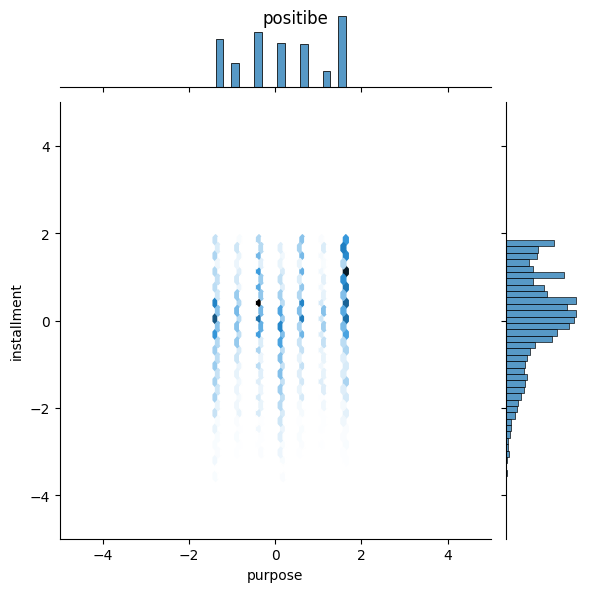

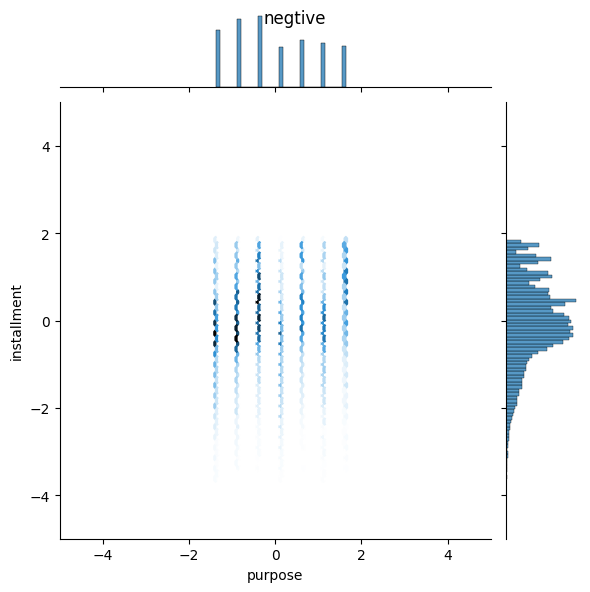

In [48]:
pos_df=pd.DataFrame(train_features[bool_train_labels],columns=train_df.columns)
neg_df=pd.DataFrame(train_features[~bool_train_labels],columns=train_df.columns)
sns.jointplot(x=pos_df['purpose'],y=pos_df['installment'],kind='hex',xlim=(-5,5),ylim=(-5,5))
plt.suptitle('positibe')
sns.jointplot(x=neg_df['purpose'],y=neg_df['installment'],kind='hex',xlim=(-5,5),ylim=(-5,5))
_ = plt.suptitle('negtive')

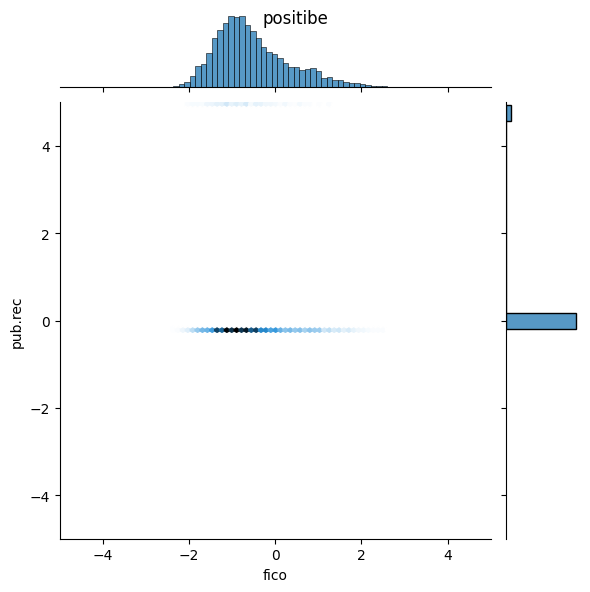

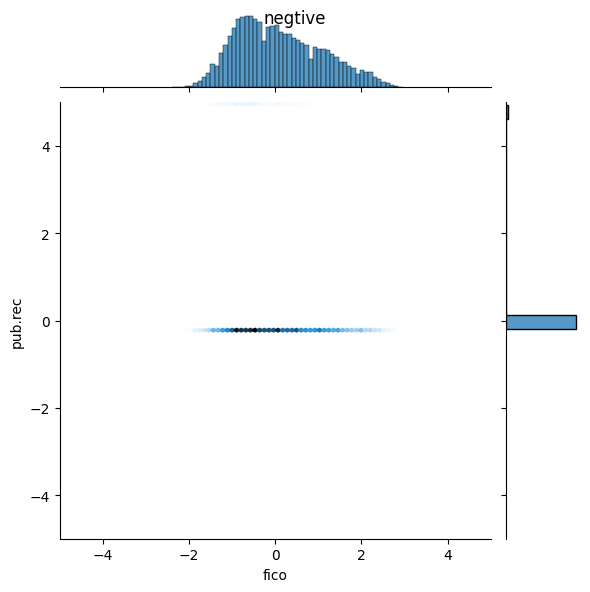

In [49]:
sns.jointplot(x=pos_df['fico'],y=pos_df['pub.rec'],kind='hex',xlim=(-5,5),ylim=(-5,5))
plt.suptitle('positibe')
sns.jointplot(x=neg_df['fico'],y=neg_df['pub.rec'],kind='hex',xlim=(-5,5),ylim=(-5,5))
_ = plt.suptitle('negtive')

In [63]:
METRICS=[
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc',curve='PR'),
    
]

In [64]:
def make_model(metrics=METRICS,output_bias=None):
    if output_bias is not None:
        output_bias= tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(
            16,activation='relu',
            input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation='sigmoid',
                           bias_initializer=output_bias),
    ])
    
    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate=1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )
    
    return model



In [65]:
EPOCHS=100 
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10, 
    mode='max',
    restore_best_weights=True

)

In [66]:
model=make_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.predict(train_features[:10])
results=model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE,verbose=0)
print(f"loss:{results[0]:0.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
loss:1.2574


In [68]:
### 这里要注意设置正确的初始偏差 计算公式 pos(pos+neg)

In [69]:
initial_bias = np.log([pos/neg])
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])
results=model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE,verbose=0)
print(f"(loss:{results[0]:0.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
(loss:0.4269)


In [70]:
initial_weights=os.path.join(tempfile.mkdtemp(),'initial_weights.weights.h5')
model.save_weights(initial_weights)

In [71]:
model=make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features,val_labels),
    verbose=0
    
)


In [72]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history=model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features,val_labels),
    verbose=0

    
)


In [73]:
def plot_loss(history,label,n):
    plt.semilogy(history.epoch,history.history['loss'],
                color=colors[n],label='train'+label)
    plt.semilogy(history.epoch,history.history['val_loss'],
                 color=colors[n],label='val'+label,
                 linestyle="--"
    )
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.legend()
    
    

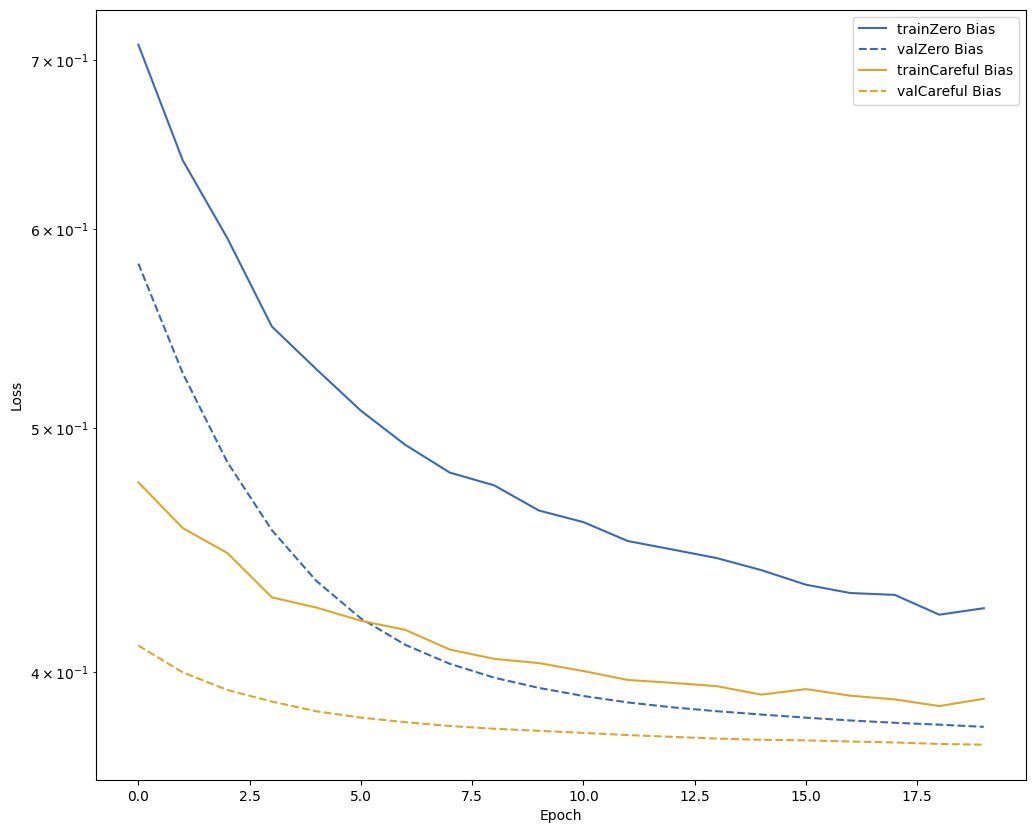

In [74]:
plot_loss(zero_bias_history,'Zero Bias',0)
plot_loss(careful_bias_history,'Careful Bias',1)


In [75]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features,val_labels)
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8322 - auc: 0.6442 - fn: 3820.4761 - fp: 941.1429 - loss: 0.4772 - prc: 0.2448 - precision: 0.3237 - recall: 0.0996 - tn: 22974.4277 - tp: 443.4762 - val_accuracy: 0.8402 - val_auc: 0.6682 - val_fn: 1107.0000 - val_fp: 172.0000 - val_loss: 0.4094 - val_prc: 0.2669 - val_precision: 0.3582 - val_recall: 0.0798 - val_tn: 6628.0000 - val_tp: 96.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8315 - auc: 0.6140 - fn: 2355.6843 - fp: 654.6842 - loss: 0.4605 - prc: 0.2364 - precision: 0.3588 - recall: 0.1356 - tn: 14551.7373 - tp: 358.8421 - val_accuracy: 0.8424 - val_auc: 0.6908 - val_fn: 1120.0000 - val_fp: 141.0000 - val_loss: 0.3997 - val_prc: 0.2816 - val_precision: 0.3705 - val_recall: 0.0690 - val_tn: 6659.0000 - val_tp: 83.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8337 - auc: 0.6287 - fn: 2544.0952 - fp: 575.9524 - loss: 0.4470 - prc: 0.2426 - precision: 0.3612 - recall:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8434 - auc: 0.7221 - fn: 2702.0869 - fp: 237.4783 - loss: 0.3921 - prc: 0.3090 - precision: 0.4476 - recall: 0.0657 - tn: 15653.7393 - tp: 184.9130 - val_accuracy: 0.8499 - val_auc: 0.7460 - val_fn: 1163.0000 - val_fp: 38.0000 - val_loss: 0.3748 - val_prc: 0.3370 - val_precision: 0.5128 - val_recall: 0.0333 - val_tn: 6762.0000 - val_tp: 40.0000
Epoch 20/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8452 - auc: 0.7246 - fn: 2697.4546 - fp: 225.2727 - loss: 0.3891 - prc: 0.3097 - precision: 0.4599 - recall: 0.0650 - tn: 15777.9541 - tp: 186.3636 - val_accuracy: 0.8504 - val_auc: 0.7464 - val_fn: 1164.0000 - val_fp: 33.0000 - val_loss: 0.3747 - val_prc: 0.3380 - val_precision: 0.5417 - val_recall: 0.0324 - val_tn: 6767.0000 - val_tp: 39.0000
Epoch 21/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8465 - auc: 0.7270 - fn: 2896.3181 - fp: 215.1364 - loss: 0.3860 - prc: 0.3100 - precision: 0.4525 - recall: 0.0566 - tn:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8445 - auc: 0.7382 - fn: 2985.3479 - fp: 208.3478 - loss: 0.3837 - prc: 0.3322 - precision: 0.4567 - recall: 0.0558 - tn: 17243.9121 - tp: 177.5217 - val_accuracy: 0.8508 - val_auc: 0.7520 - val_fn: 1162.0000 - val_fp: 32.0000 - val_loss: 0.3708 - val_prc: 0.3491 - val_precision: 0.5616 - val_recall: 0.0341 - val_tn: 6768.0000 - val_tp: 41.0000
Epoch 38/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8493 - auc: 0.7420 - fn: 2789.7600 - fp: 190.9600 - loss: 0.3777 - prc: 0.3359 - precision: 0.5109 - recall: 0.0669 - tn: 16505.8809 - tp: 195.4000 - val_accuracy: 0.8508 - val_auc: 0.7521 - val_fn: 1159.0000 - val_fp: 35.0000 - val_loss: 0.3706 - val_prc: 0.3498 - val_precision: 0.5570 - val_recall: 0.0366 - val_tn: 6765.0000 - val_tp: 44.0000
Epoch 39/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8476 - auc: 0.7450 - fn: 2922.8572 - fp: 204.3571 - loss: 0.3779 - prc: 0.3392 - precision: 0.4895 - recall: 0.0630 - tn:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8477 - auc: 0.7487 - fn: 2772.6399 - fp: 171.7200 - loss: 0.3762 - prc: 0.3383 - precision: 0.4844 - recall: 0.0531 - tn: 16222.3604 - tp: 157.2400 - val_accuracy: 0.8511 - val_auc: 0.7538 - val_fn: 1160.0000 - val_fp: 32.0000 - val_loss: 0.3691 - val_prc: 0.3553 - val_precision: 0.5733 - val_recall: 0.0357 - val_tn: 6768.0000 - val_tp: 43.0000
Epoch 56/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8476 - auc: 0.7505 - fn: 2991.7778 - fp: 195.2963 - loss: 0.3762 - prc: 0.3431 - precision: 0.4948 - recall: 0.0595 - tn: 17546.2969 - tp: 193.2593 - val_accuracy: 0.8512 - val_auc: 0.7537 - val_fn: 1155.0000 - val_fp: 36.0000 - val_loss: 0.3689 - val_prc: 0.3558 - val_precision: 0.5714 - val_recall: 0.0399 - val_tn: 6764.0000 - val_tp: 48.0000
Epoch 57/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8453 - auc: 0.7445 - fn: 2646.4583 - fp: 189.5417 - loss: 0.3809 - prc: 0.3350 - precision: 0.4711 - recall: 0.0610 - tn:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8457 - auc: 0.7486 - fn: 2839.1819 - fp: 174.8636 - loss: 0.3795 - prc: 0.3450 - precision: 0.5071 - recall: 0.0583 - tn: 16438.9082 - tp: 178.8182 - val_accuracy: 0.8508 - val_auc: 0.7545 - val_fn: 1158.0000 - val_fp: 36.0000 - val_loss: 0.3684 - val_prc: 0.3583 - val_precision: 0.5556 - val_recall: 0.0374 - val_tn: 6764.0000 - val_tp: 45.0000
Epoch 74/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8499 - auc: 0.7500 - fn: 2841.0454 - fp: 172.0909 - loss: 0.3727 - prc: 0.3394 - precision: 0.5008 - recall: 0.0574 - tn: 16759.0918 - tp: 173.3182 - val_accuracy: 0.8508 - val_auc: 0.7544 - val_fn: 1159.0000 - val_fp: 35.0000 - val_loss: 0.3683 - val_prc: 0.3581 - val_precision: 0.5570 - val_recall: 0.0366 - val_tn: 6765.0000 - val_tp: 44.0000
Epoch 75/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8486 - auc: 0.7511 - fn: 2811.0454 - fp: 175.3636 - loss: 0.3750 - prc: 0.3492 - precision: 0.5199 - recall: 0.0625 - tn:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8478 - auc: 0.7578 - fn: 2724.3157 - fp: 182.5789 - loss: 0.3726 - prc: 0.3498 - precision: 0.4995 - recall: 0.0644 - tn: 15909.6846 - tp: 182.2632 - val_accuracy: 0.8512 - val_auc: 0.7551 - val_fn: 1158.0000 - val_fp: 33.0000 - val_loss: 0.3680 - val_prc: 0.3586 - val_precision: 0.5769 - val_recall: 0.0374 - val_tn: 6767.0000 - val_tp: 45.0000
Epoch 92/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8473 - auc: 0.7494 - fn: 2813.3501 - fp: 168.3000 - loss: 0.3771 - prc: 0.3400 - precision: 0.5040 - recall: 0.0556 - tn: 16495.2500 - tp: 172.4500 - val_accuracy: 0.8513 - val_auc: 0.7551 - val_fn: 1158.0000 - val_fp: 32.0000 - val_loss: 0.3680 - val_prc: 0.3587 - val_precision: 0.5844 - val_recall: 0.0374 - val_tn: 6768.0000 - val_tp: 45.0000
Epoch 93/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8493 - auc: 0.7472 - fn: 2812.1201 - fp: 173.5600 - loss: 0.3742 - prc: 0.3419 - precision: 0.5027 - recall: 0.0581 - tn:

In [78]:
def plot_metrics(history):
    metrics=['loss','prc','precision','recall']
    for n,metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,history.history[metric],color=colors[0],label='Train')
        plt.plot(history.epoch,history.history['val_'+metric],color=colors[0],linestyle="--",label='val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == "loss":
            plt.ylim([0,plt.ylim()[1]])
        elif metric == "auc":
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])
        plt.legend()
        

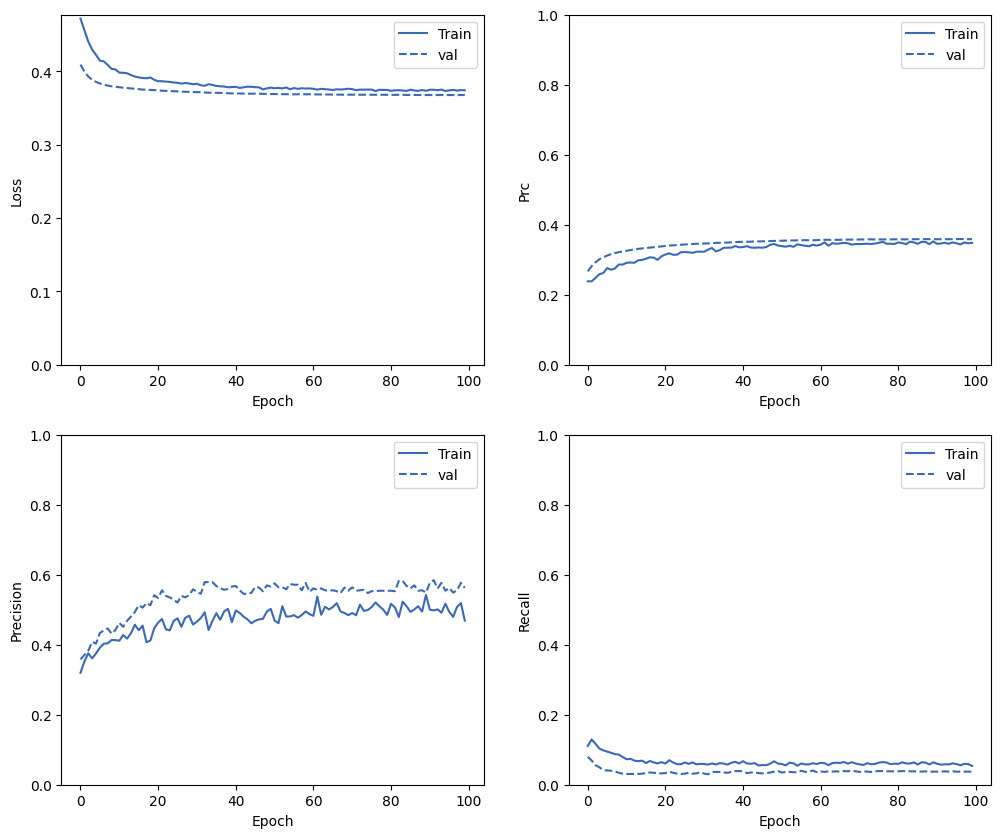

In [79]:
plot_metrics(baseline_history)

In [80]:
def plot_cm(labels,predictions,p=0.5):
    cm = confusion_matrix(labels,predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt='d')
    
    plt.title('Confusion matirx @{:.2f}'.format(p))
    plt.ylabel('actual label')
    plt.xlabel('predicted label')
    
    print('false negative ', cm[0][0])
    print('false positive', cm[0][1])
    print('True negative  ',cm[1][0])
    print('false negative' ,cm[1][1])
    print('total not fully paid', np.sum(cm[1]))

In [81]:
train_predictions_baseline=model.predict(train_features,batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features,batch_size=BATCH_SIZE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


loss : 0.36665016412734985
compile_metrics : 43.0

false negative  6775
false positive 34
True negative   1151
false negative 43
total not fully paid 1194


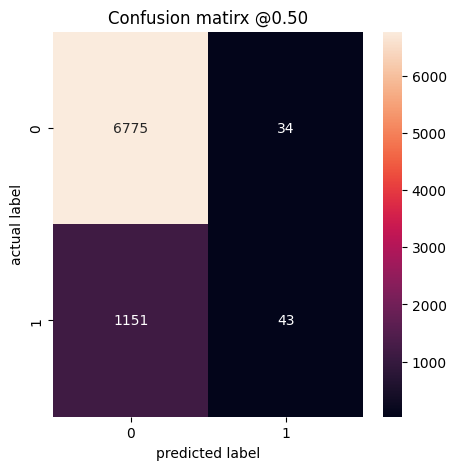

In [82]:
baseline_results = model.evaluate(test_features,test_labels,batch_size=BATCH_SIZE,verbose=0)
for name, value in zip(model.metrics_names,baseline_results):
    print(name,':',value)
print()

plot_cm(test_labels,test_predictions_baseline)

In [83]:
def plot_roc(name,labels, predictions,**kwargs):
    fp,tp,_ = sklearn.metrics.roc_curve(labels,predictions)
    plt.plot(100*fp,100*tp,label = name, linewidth=2,**kwargs)
    plt.xlabel('False positive')
    plt.ylabel('True positive')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

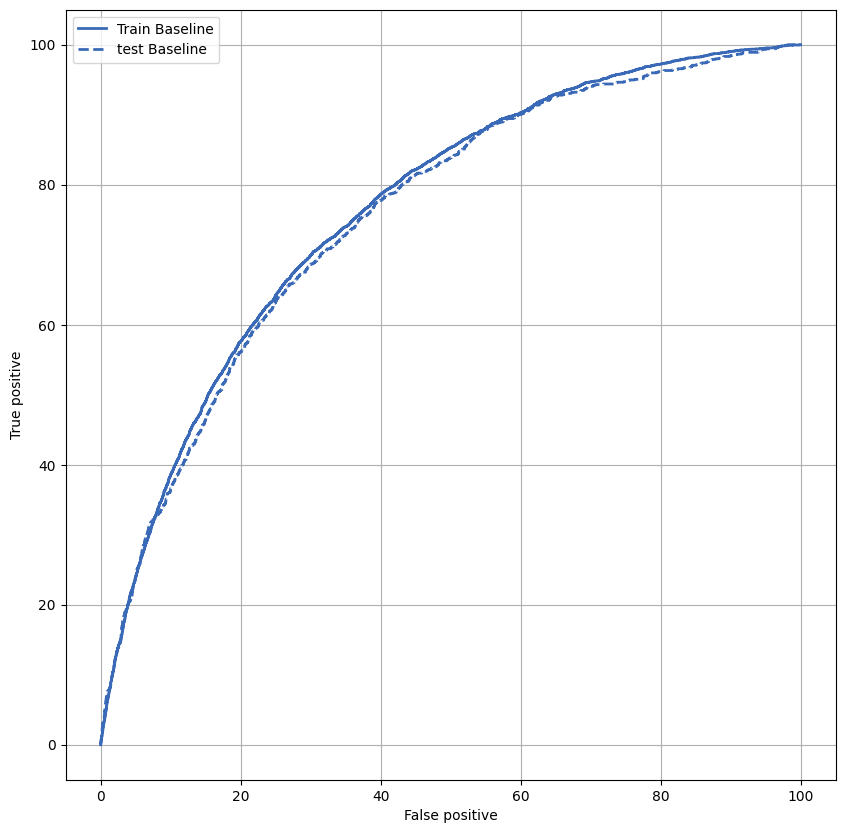

In [84]:
plot_roc("Train Baseline",train_labels,train_predictions_baseline,color=colors[0])
plot_roc('test Baseline',test_labels,test_predictions_baseline,color=colors[0],linestyle='--')
plt.legend()

In [137]:
weight_for_0=(4/neg)*(total/2.0) 
weight_for_1=(1/pos)*(total/2.0)

class_weight ={0:weight_for_0,1:weight_for_1}
print(class_weight)

{0: np.float64(2.3585723127707863), 1: np.float64(3.2888377445339474)}


In [138]:
weighted_model=make_model()
weighted_model.load_weights(initial_weights)

In [139]:
weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features,val_labels),
    class_weight=class_weight

)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8012 - auc: 0.6303 - fn: 2959.0000 - fp: 2157.2942 - loss: 1.3806 - prc: 0.2583 - precision: 0.3161 - recall: 0.2743 - tn: 20110.3535 - tp: 998.5883 - val_accuracy: 0.8393 - val_auc: 0.6705 - val_fn: 1087.0000 - val_fp: 199.0000 - val_loss: 0.4092 - val_prc: 0.2694 - val_precision: 0.3683 - val_recall: 0.0964 - val_tn: 6601.0000 - val_tp: 116.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8257 - auc: 0.6166 - fn: 2668.8181 - fp: 869.2273 - loss: 1.3415 - prc: 0.2318 - precision: 0.3192 - recall: 0.1322 - tn: 16333.4541 - tp: 411.9091 - val_accuracy: 0.8403 - val_auc: 0.6947 - val_fn: 1087.0000 - val_fp: 191.0000 - val_loss: 0.3994 - val_prc: 0.2857 - val_precision: 0.3779 - val_recall: 0.0964 - val_tn: 6609.0000 - val_tp: 116.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8299 - auc: 0.6401 - fn: 2503.6086 - fp: 775.8261 - loss: 1.2898 - prc: 0.2556 - precision: 0.3559 - reca

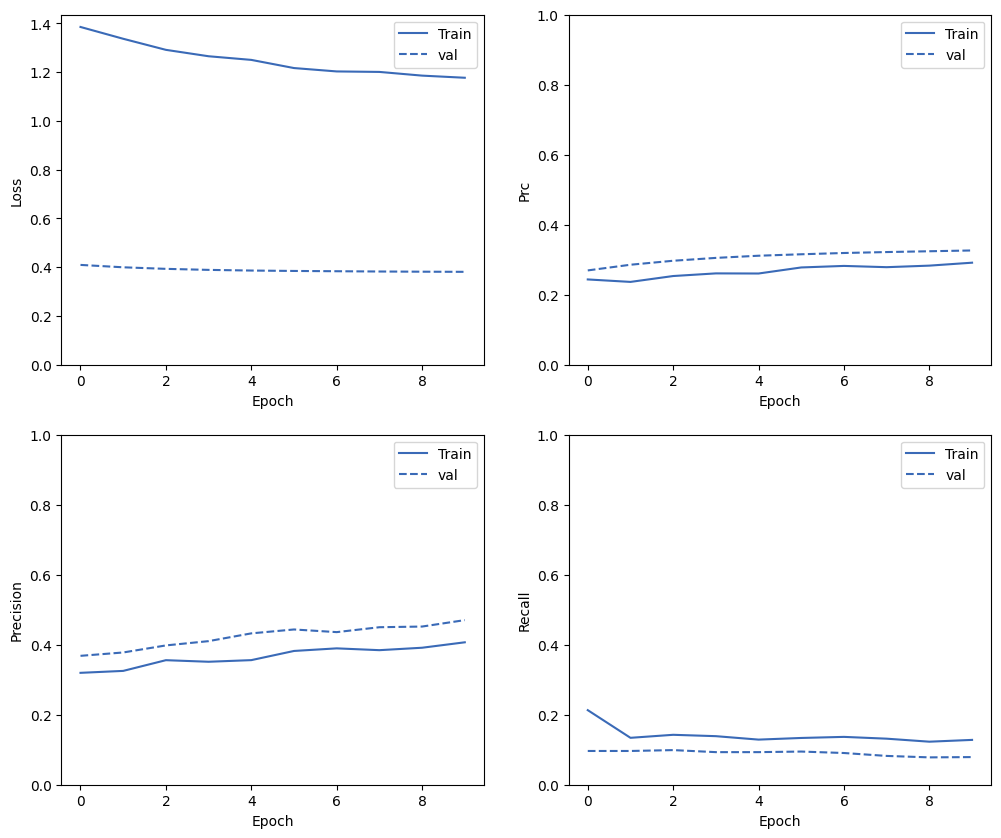

In [140]:
plot_metrics(weighted_history)


In [141]:
train_predictions_weighted = weighted_model.predict(train_features,batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features,batch_size=BATCH_SIZE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


loss : 0.40416595339775085
compile_metrics : 120.0

false negative  6620
false positive 189
True negative   1074
false negative 120
total not fully paid 1194


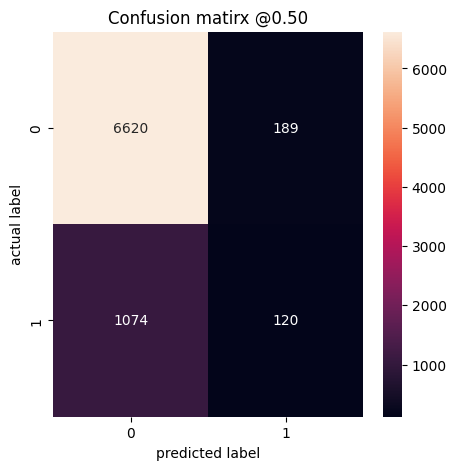

In [142]:
weighted_results=weighted_model.evaluate(test_features,test_labels,batch_size=BATCH_SIZE,verbose=0)
for name,value in zip(weighted_model.metrics_names,weighted_results):
    print(name,":",value)
print()

plot_cm(test_labels,test_predictions_weighted)


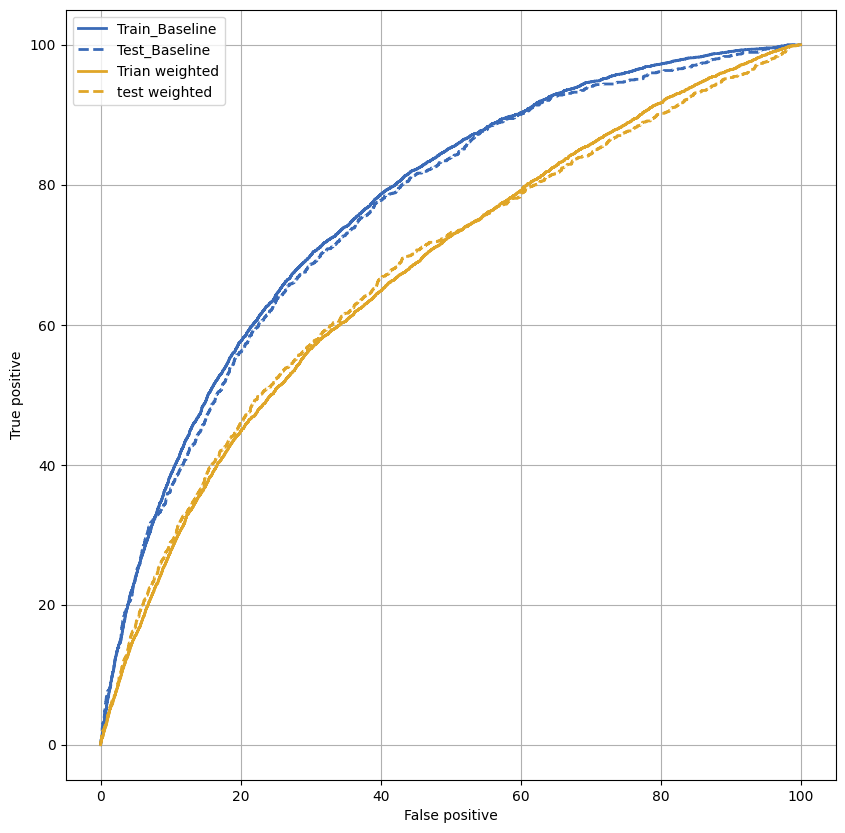

In [143]:
plot_roc("Train_Baseline",train_labels,train_predictions_baseline,color=colors[0])
plot_roc("Test_Baseline",test_labels,test_predictions_baseline,color=colors[0],linestyle="--")

plot_roc("Trian weighted",train_labels,train_predictions_weighted,color=colors[1])
plot_roc("test weighted",test_labels,test_predictions_weighted,color=colors[1],linestyle="--")

plt.legend()

In [144]:
pos_features=train_features[bool_train_labels]
neg_features=train_features[~bool_train_labels]

pos_labels=train_labels[bool_train_labels]
neg_labels=train_labels[~bool_train_labels]


In [145]:
ids=np.arange(len(pos_features))
choices = np.random.choice(ids,len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels= pos_labels[choices]

res_pos_features.shape



(27129, 12)

In [146]:
resampled_features=np.concatenate([res_pos_features,neg_features],axis=0)
resampled_labels=np.concatenate([res_pos_labels,neg_labels],axis=0)

In [147]:
order=np.arange(len(resampled_labels))
np.random.shuffle(order)

resampled_features=resampled_features[order]
resampled_labels=resampled_labels[order]

resampled_features.shape

(54258, 12)

In [ ]:
oversample_model=make_model()
oversample_model.load_weights(initial_weights)
output_layer = oversample_model.layers[-1]
output_layer.bias.assign([0])

oversample_history=oversample_model.fit(
    resampled_features,
    resampled_labels,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=val_ds
    
    
)


Epoch 1/100
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6499 - auc: 0.7020 - fn: 5710.6719 - fp: 7100.6494 - loss: 0.6614 - prc: 0.6008 - precision: 0.5520 - recall: 0.6242 - tn: 14068.9414 - tp: 9841.6846 - val_accuracy: 0.6747 - val_auc: 0.7514 - val_fn: 367.0000 - val_fp: 2236.0000 - val_loss: 0.5910 - val_prc: 0.3443 - val_precision: 0.2721 - val_recall: 0.6949 - val_tn: 4564.0000 - val_tp: 836.0000
Epoch 2/100
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6847 - auc: 0.7456 - fn: 4066.6299 - fp: 5102.6689 - loss: 0.6014 - prc: 0.7228 - precision: 0.6739 - recall: 0.7196 - tn: 9422.4473 - tp: 10547.4229 - val_accuracy: 0.6772 - val_auc: 0.7534 - val_fn: 370.0000 - val_fp: 2213.0000 - val_loss: 0.5795 - val_prc: 0.3519 - val_precision: 0.2735 - val_recall: 0.6924 - val_tn: 4587.0000 - val_tp: 833.0000
Epoch 3/100
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6833 - auc: 0.7455 - fn: 4106.2422 - fp: 5230.0410 - loss: 0.5995 - prc: 0.7231 - precisio

In [154]:
BUFFER_SIZE=100000
def make_ds(features,labels):
    ds = tf.data.Dataset.from_tensor_slices((features,labels))
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds
pos_ds = make_ds(pos_features,pos_labels)
neg_ds = make_ds(neg_features,neg_labels)

for features,label in pos_ds.take(1):
    print("feature:\n,",features.numpy())
    print()
    print("labels:",label.numpy())
    
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds,neg_ds],weights=[0.5,0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

feature:
, [ 1.6374898  -0.08876603  1.51132775  0.64006778 -1.52411681  0.59750445
  1.18186809  0.74075056 -0.49845879  0.21904443  1.60183332 -0.20226032]

labels: 1.0


In [155]:
for features,label in resampled_ds.take(1):
    print(label.numpy().mean())

0.5048828125


In [156]:
resampled_steps_per_epoch=np.ceil(2.0*neg/BATCH_SIZE)
print(resampled_steps_per_epoch)

34.0


In [157]:
resampled_model=make_model()
resampled_model.load_weights(initial_weights)

output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

val_ds=tf.data.Dataset.from_tensor_slices((val_features,val_labels)).cache()
val_ds=val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch = int(resampled_steps_per_epoch),
    callbacks = [early_stopping],
    validation_data=val_ds
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6419 - auc: 0.6792 - fn: 9789.4854 - fp: 7004.9712 - loss: 0.7628 - prc: 0.5873 - precision: 0.5806 - recall: 0.4796 - tn: 18181.7715 - tp: 9832.2568 - val_accuracy: 0.6956 - val_auc: 0.7011 - val_fn: 489.0000 - val_fp: 1947.0000 - val_loss: 0.6437 - val_prc: 0.2896 - val_precision: 0.2683 - val_recall: 0.5935 - val_tn: 4853.0000 - val_tp: 714.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6034 - auc: 0.6489 - fn: 7710.3999 - fp: 6802.1143 - loss: 0.6969 - prc: 0.6447 - precision: 0.6086 - recall: 0.5774 - tn: 11634.0859 - tp: 10658.8857 - val_accuracy: 0.6990 - val_auc: 0.7255 - val_fn: 456.0000 - val_fp: 1953.0000 - val_loss: 0.6261 - val_prc: 0.3099 - val_precision: 0.2767 - val_recall: 0.6209 - val_tn: 4847.0000 - val_tp: 747.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6224 - auc: 0.6741 - fn: 7283.0288 - fp: 6535.5430 - loss: 0.6673 - prc: 0.6630 - precision: 0.6275

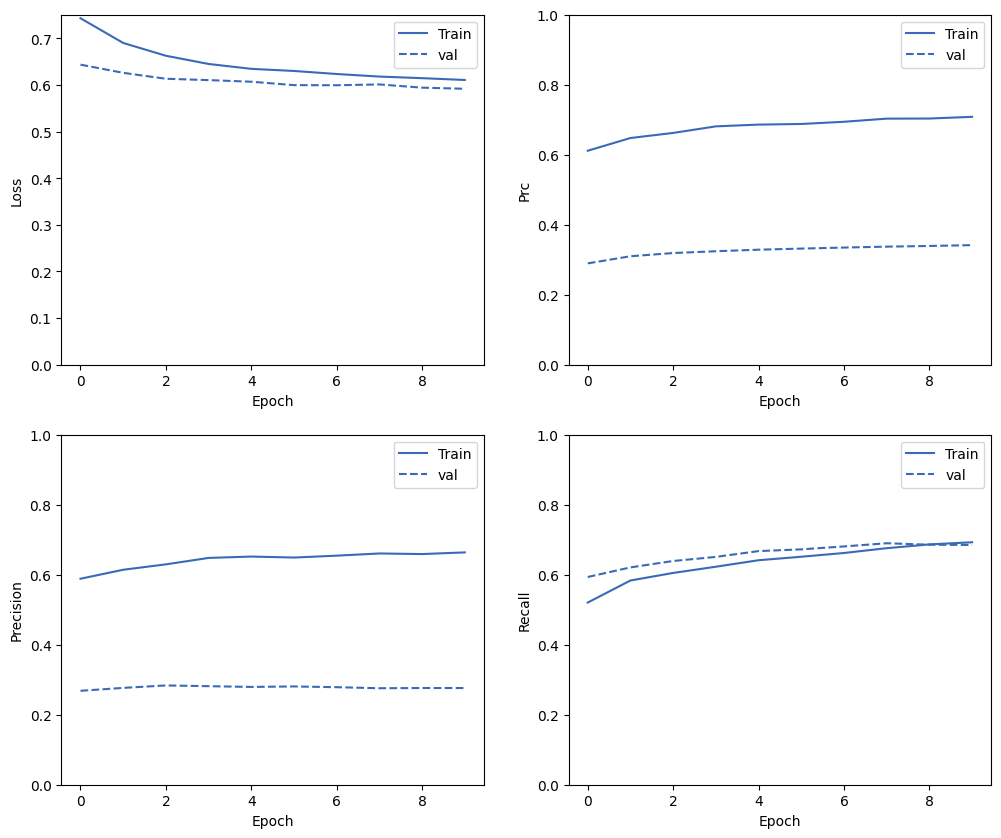

In [158]:
plot_metrics(resampled_history )

In [100]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5550 - auc: 0.6226 - fn: 3036.0952 - fp: 10839.5234 - loss: 0.9120 - prc: 0.4826 - precision: 0.4534 - recall: 0.7561 - tn: 7111.5239 - tp: 9446.3330 - val_accuracy: 0.2517 - val_auc: 0.5244 - val_fn: 150.0000 - val_fp: 5839.0000 - val_loss: 1.0157 - val_prc: 0.1835 - val_precision: 0.1595 - val_recall: 0.8808 - val_tn: 906.0000 - val_tp: 1108.0000
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5123 - auc: 0.5287 - fn: 2882.4761 - fp: 8018.2383 - loss: 0.8400 - prc: 0.5319 - precision: 0.5081 - recall: 0.7421 - tn: 3221.8572 - tp: 8307.9043 - val_accuracy: 0.3114 - val_auc: 0.5780 - val_fn: 193.0000 - val_fp: 5318.0000 - val_loss: 0.8966 - val_prc: 0.2125 - val_precision: 0.1668 - val_recall: 0.8466 - val_tn: 1427.0000 - val_tp: 1065.0000
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5293 - auc: 0.5556 - fn: 3189.2380 - fp: 7327.9048 - loss: 0.7817 - prc: 0.5598 - precision: 0.52

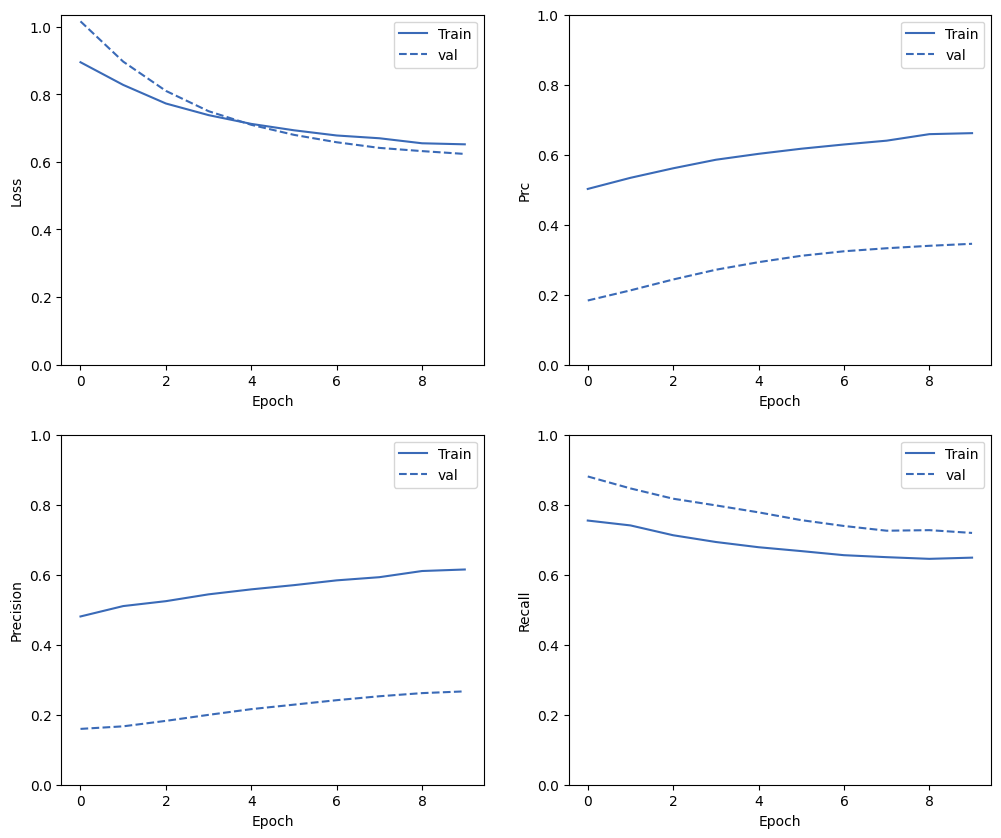

In [101]:
plot_metrics(resampled_history)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
loss :  1.0193040370941162
compile_metrics :  1068.0

false negative  898
false positive 5889
True negative   148
false negative 1068
total not fully paid 1216


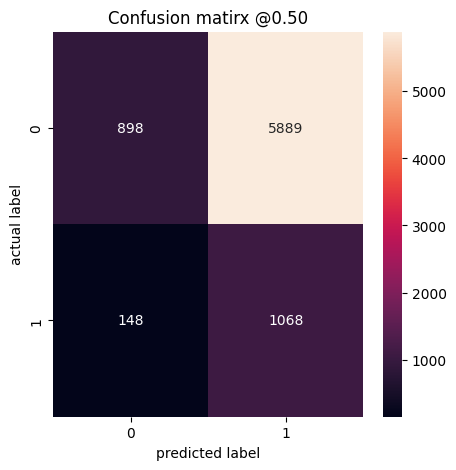

In [102]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

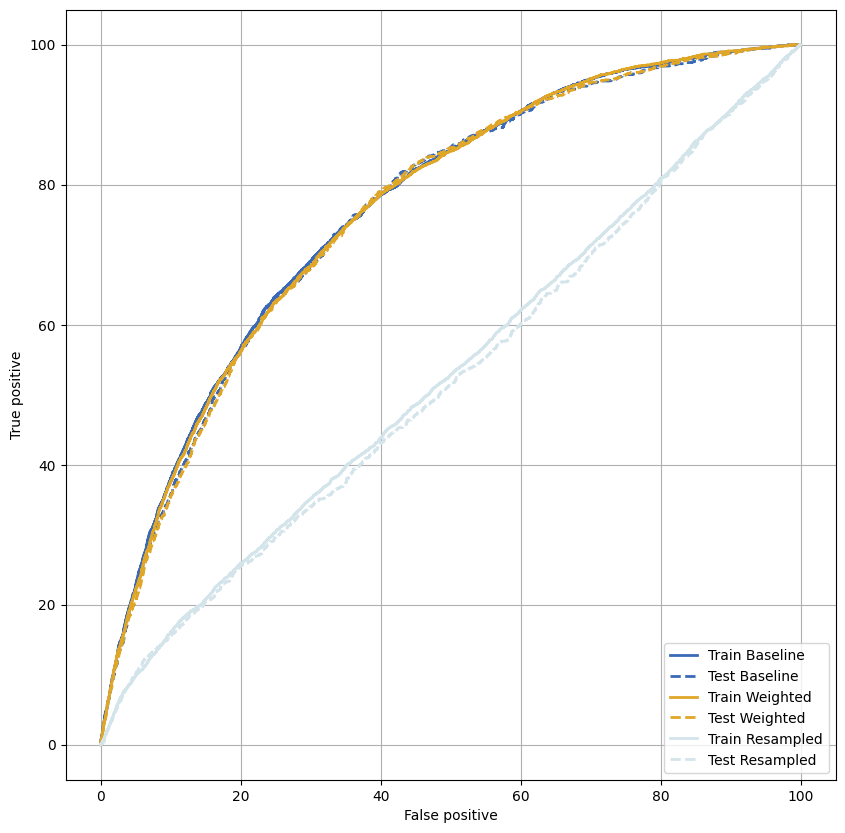

In [103]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');